## Go through sets of dendro structures and identify matches with filaments.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table

In [2]:
cubedir = 'images/'
analdir = 'struct/'
fil_skel = fits.getdata(analdir+'30Dor_feather_12CO_fp_80_st_80_at_10_gt_4.skel.fits.gz')
print(fil_skel.shape)

(1000, 800)


Working on 30Dor_feather_mosaic_1p8_12
Cube dimensions: 800 1000 300
Found 198 clusters
Working on structure 1 of 198
Working on structure 101 of 198
Number of clusters on filaments: 117
Number of clusters not on filaments: 25


/var/folders/dr/623sc0b554s_rzxllbc_9tqc0000gn/T/ipykernel_28913/2997873054.py:91: UserWarning: No contour levels were found within the data range.
  ax1.contour(fil_skel, levels=[1], colors='green', zorder=2, linewidths=2, alpha=0.6)
/var/folders/dr/623sc0b554s_rzxllbc_9tqc0000gn/T/ipykernel_28913/2997873054.py:100: UserWarning: No contour levels were found within the data range.
  ax2.contour(fil_skel, levels=[1], colors='k', zorder=1, linewidths=2)


Working on 30Dor_feather_mosaic_1p8_13
Cube dimensions: 800 1000 300
Found 71 clusters
Working on structure 1 of 71
Number of clusters on filaments: 59
Number of clusters not on filaments: 2


/var/folders/dr/623sc0b554s_rzxllbc_9tqc0000gn/T/ipykernel_28913/2997873054.py:91: UserWarning: No contour levels were found within the data range.
  ax1.contour(fil_skel, levels=[1], colors='green', zorder=2, linewidths=2, alpha=0.6)
/var/folders/dr/623sc0b554s_rzxllbc_9tqc0000gn/T/ipykernel_28913/2997873054.py:100: UserWarning: No contour levels were found within the data range.
  ax2.contour(fil_skel, levels=[1], colors='k', zorder=1, linewidths=2)


Working on 30Dor_feather_mosaic_1p8_12
Cube dimensions: 800 1000 300
Found 2185 leaves
On fils: [  32   80   82  108  140  166  174  228  229  249  263  264  332  358
  361  372  382  387  421  422  441  469  472  498  513  537  677  761
  788  818  851  866  870  887  946  971  989 1003 1007 1023 1062 1071
 1083 1088 1089 1137 1241 1266 1268 1275 1292 1293 1305 1341 1342 1347
 1381 1425 1451 1505 1508 1528 1564 1608 1662 1689 1714 1724 1730 1738
 1740 1780 1811 1834 1852 1885 1891 1959 1991 1995 2030 2041 2053 2058
 2064 2072 2097 2127 2130 2138 2139 2205 2217 2221 2227 2266 2267 2284
 2289 2291 2334 2364 2376 2400 2404 2407 2408 2422 2511 2520 2523 2541
 2548 2552 2559 2566 2568 2574 2580 2645 2714 2727 2774 2826 2877 2884
 2894 2910 2923 2934 2959 2974 2977 2987 3005 3015 3035 3046 3050 3073
 3080 3095 3111 3126 3155 3256 3292 3312 3386 3445 3468 3483]
Not on fils: [ 107  125  146  250  277  299  514  708  721  741  782  816  918  945
 1114 1143 1150 1361 1410 1518 1547 1548 1876 19

/var/folders/dr/623sc0b554s_rzxllbc_9tqc0000gn/T/ipykernel_28913/2997873054.py:91: UserWarning: No contour levels were found within the data range.
  ax1.contour(fil_skel, levels=[1], colors='green', zorder=2, linewidths=2, alpha=0.6)
/var/folders/dr/623sc0b554s_rzxllbc_9tqc0000gn/T/ipykernel_28913/2997873054.py:100: UserWarning: No contour levels were found within the data range.
  ax2.contour(fil_skel, levels=[1], colors='k', zorder=1, linewidths=2)


Working on 30Dor_feather_mosaic_1p8_13
Cube dimensions: 800 1000 300
Found 479 leaves
Working on structure 1 of 479
Working on structure 101 of 479
Working on structure 201 of 479
Working on structure 301 of 479
Working on structure 401 of 479
Number of leaves on filaments: 60
Number of leaves not on filaments: 0


/var/folders/dr/623sc0b554s_rzxllbc_9tqc0000gn/T/ipykernel_28913/2997873054.py:91: UserWarning: No contour levels were found within the data range.
  ax1.contour(fil_skel, levels=[1], colors='green', zorder=2, linewidths=2, alpha=0.6)
/var/folders/dr/623sc0b554s_rzxllbc_9tqc0000gn/T/ipykernel_28913/2997873054.py:100: UserWarning: No contour levels were found within the data range.
  ax2.contour(fil_skel, levels=[1], colors='k', zorder=1, linewidths=2)


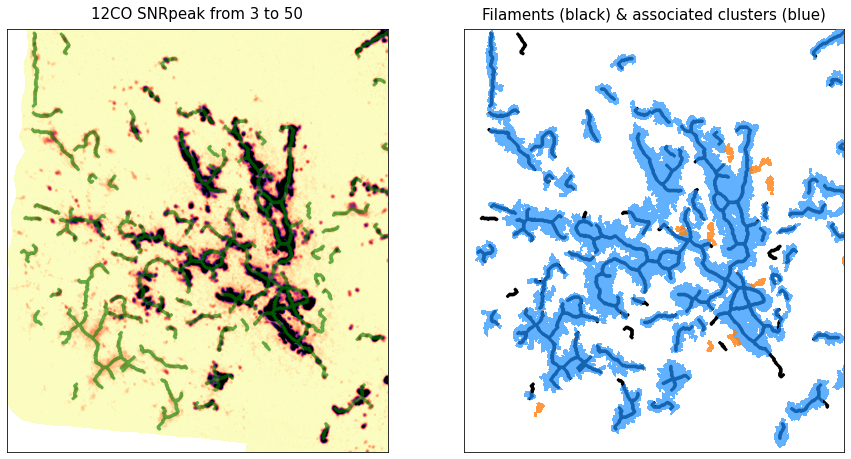

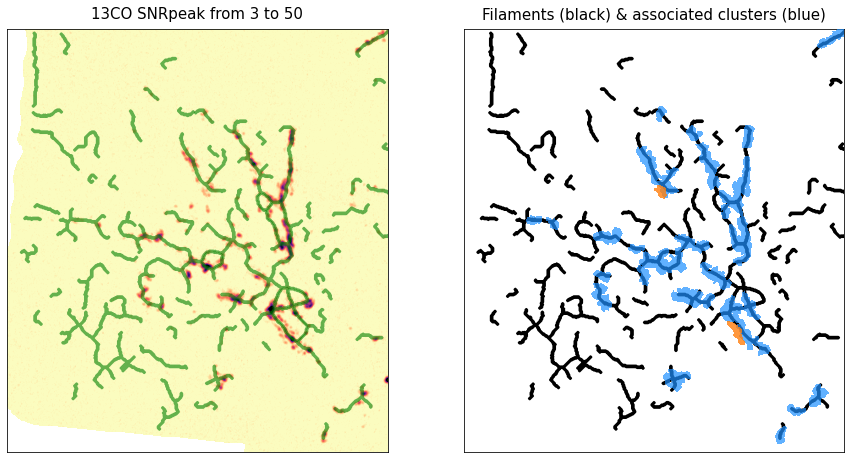

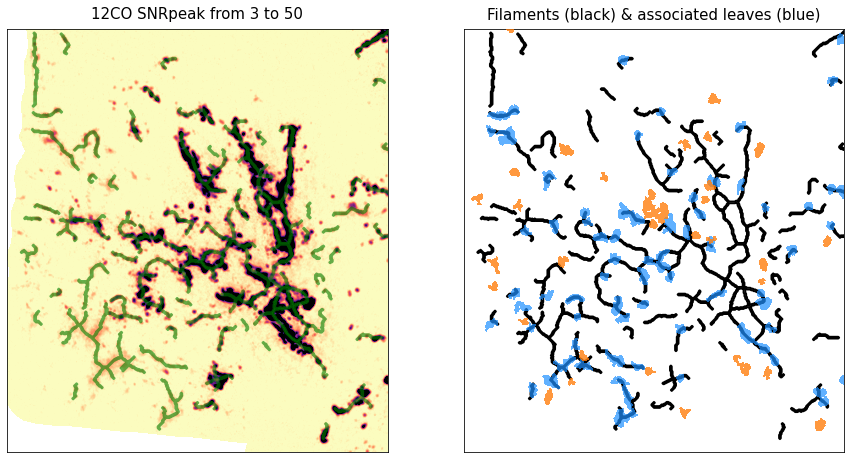

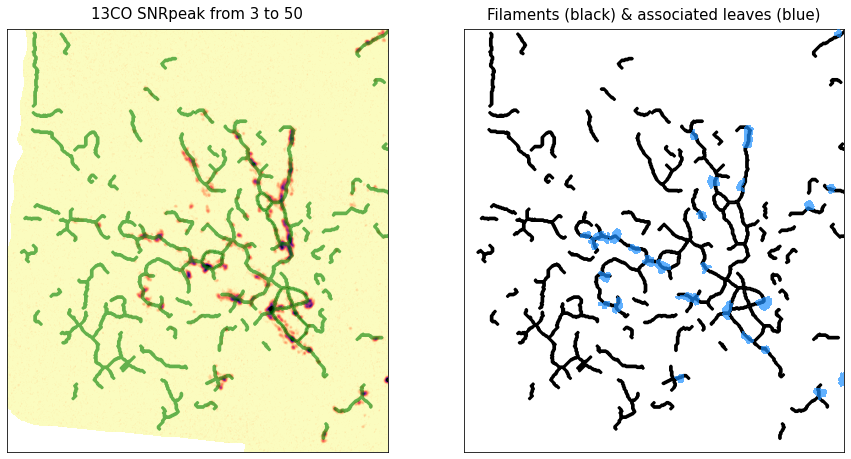

In [3]:
sigvir_v = [[], [], [], []]
sigvir_x = [[], [], [], []]
siglum_v = [[], [], [], []]
siglum_x = [[], [], [], []]
alphas_v = [[], [], [], []]
alphas_x = [[], [], [], []]
i_set = 0

for dendrotyp in (['clusters', 'leaves']):
    for line in (['12','13']):
        # --- Read the FITS data
        label='30Dor_feather_mosaic_1p8_'+line
        print('Working on',label)
        snrpk, hd2d = fits.getdata(cubedir+'30Dor_feather_mosaic_'+line+'CO_12meter.snrpk.fits.gz', header=True)
        asgn, hd3d = fits.getdata(analdir+label+'_'+dendrotyp+'_asgn.fits.gz', header=True)
        dendro_all = np.amax(asgn, axis=0)
        print('Cube dimensions:',hd3d['naxis1'],hd3d['naxis2'],hd3d['naxis3'])
        prop_table = Table.read(analdir+label+'_physprop_add.txt', format="ascii.ecsv")
        # Now considering only resolved structures
        resolve_table = Table.read(analdir+label+'_physprop_resolve.txt', format="ascii.ecsv")

        dendro_id = np.unique(asgn[asgn>-1])
        print('Found {} {}'.format(len(dendro_id),dendrotyp))

        if os.path.isfile(label+'_'+dendrotyp+'_asgn_onfil.fits.gz'):
            asgn_onfil = fits.getdata(label+'_'+dendrotyp+'_asgn_onfil.fits.gz')
            yesfil = np.unique(asgn_onfil[asgn_onfil>-1])
            remain = np.setdiff1d(dendro_id, yesfil)
            notfil = np.intersect1d(resolve_table['_idx'], remain)
            print('On fils:',yesfil)
            print('Not on fils:',notfil)
        else:
            notfil = []
            yesfil = []
            asgn_onfil = asgn.copy()
            asgn_offil = asgn.copy()
            for idx, idnum in enumerate(dendro_id):
                if idx % 100 == 0:
                    print('Working on structure',idx+1,'of',len(dendro_id))
                mask3d = (asgn_onfil == idnum).astype(int)
                mask2d = np.amax(mask3d, axis=0)
                overlap = np.sum(mask2d*fil_skel)
                if idnum not in resolve_table['_idx']:
                    #print('Structure {} not found in resolved table'.format(idnum))
                    asgn_onfil[asgn_onfil == idnum] = -1
                    asgn_offil[asgn_offil == idnum] = -1
                elif overlap == 0.:
                    #print('Structure',idnum,'does not overlap a filament')
                    asgn_onfil[asgn_onfil == idnum] = -1
                    notfil.append(idnum)
                else:
                    #print('Structure',idnum,'overlaps on',overlap,'pixels')
                    asgn_offil[asgn_offil == idnum] = -1
                    yesfil.append(idnum)
            fits.writeto(analdir+label+'_'+dendrotyp+'_asgn_offil.fits.gz', asgn_offil, hd3d, overwrite=True)
            fits.writeto(analdir+label+'_'+dendrotyp+'_asgn_onfil.fits.gz', asgn_onfil, hd3d, overwrite=True)

        print('Number of {} on filaments: {}'.format(dendrotyp,len(yesfil)))
        print('Number of {} not on filaments: {}'.format(dendrotyp,len(notfil)))
        sigvir_v[i_set] = np.log10(prop_table["sigvir"][yesfil])
        sigvir_x[i_set] = np.log10(prop_table["sigvir"][notfil])

        if line == '12':
            siglum_v[i_set] = np.log10(prop_table["siglum"][yesfil])
            siglum_x[i_set] = np.log10(prop_table["siglum"][notfil])
        else:
            siglum_v[i_set] = np.log10(prop_table["siglte"][yesfil])
            siglum_x[i_set] = np.log10(prop_table["siglte"][notfil])

        alphas_v[i_set] = sigvir_v[i_set] - siglum_v[i_set]
        alphas_x[i_set] = sigvir_x[i_set] - siglum_x[i_set]

        if os.path.isfile(label+'_'+dendrotyp+'_asgn_onfil_max.fits.gz'):
            dendro_fil = fits.getdata(label+'_'+dendrotyp+'_asgn_onfil_max.fits.gz')
            dendro_off = fits.getdata(label+'_'+dendrotyp+'_asgn_offil_max.fits.gz')
        else:
            dendro_fil = np.amax(asgn_onfil, axis=0)
            hd2d['datamin'] = -1
            hd2d['datamax'] = np.amax(dendro_fil)
            fits.writeto(analdir+label+'_'+dendrotyp+'_asgn_onfil_max.fits.gz', dendro_fil, hd2d, overwrite=True)
            dendro_off = np.amax(asgn_offil, axis=0)
            hd2d['datamin'] = -1
            hd2d['datamax'] = np.amax(dendro_off)
            fits.writeto(analdir+label+'_'+dendrotyp+'_asgn_offil_max.fits.gz', dendro_off, hd2d, overwrite=True)


        vmin=3
        vmax=50
        fig, [ax1,ax2] = plt.subplots(1,2,figsize=(15,12), sharex=True, sharey=True)
        ax1.imshow(snrpk, origin='lower', cmap='magma_r', vmin=vmin, vmax=vmax)
        ax1.contour(fil_skel, levels=[1], colors='green', zorder=2, linewidths=2, alpha=0.6)
        ax1.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)    
        ax1.set_title(line+'CO SNRpeak from '+str(vmin)+' to '+str(vmax), pad=10, size=15)
        ax1.set_xlim([50, 500])
        ax1.set_ylim([320, 820])
        #
        ax2.imshow(snrpk*0, origin='lower', cmap='binary', vmin=vmin, vmax=vmax)
        ax2.contourf((dendro_fil>0), levels=[0.5,1.5], colors='dodgerblue', zorder=3, alpha=0.7)
        ax2.contourf((dendro_off>0), levels=[0.5,1.5], colors='tab:orange', zorder=3, alpha=0.8)
        ax2.contour(fil_skel, levels=[1], colors='k', zorder=1, linewidths=2)
        ax2.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)    
        ax2.set_title('Filaments (black) & associated '+dendrotyp+' (blue)', pad=10, size=15)
        #
        plt.savefig(dendrotyp+line+'_on_fils.pdf', bbox_inches='tight', pad_inches=0)
        i_set += 1

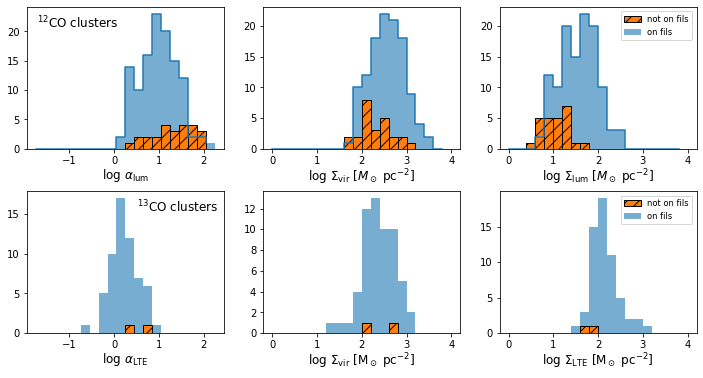

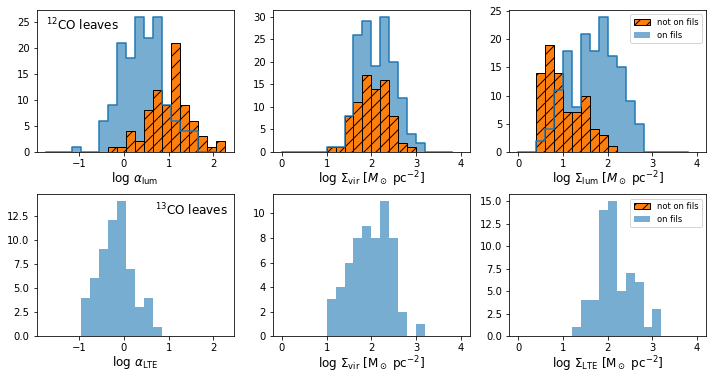

In [4]:
nbin = 20
for i, dendrotyp in enumerate(['clusters', 'leaves']):
    set12 = 2*i
    set13 = 2*i+1
    fig = plt.figure(figsize=(12, 6))
    grid = plt.GridSpec(2,3)
    plt.subplots_adjust(hspace=.3)

    # 12co dendros
    ax1 = fig.add_subplot(grid[0, 0])
    plt.hist(alphas_x[set12], bins=nbin, range=(-1.75, 2.25), color="tab:orange", edgecolor='k',
             zorder=5, hatch='//', label="not on fils")
    nhist, edge, _ = plt.hist(alphas_v[set12], bins=nbin, range=(-1.75, 2.25), color="tab:blue", 
                              alpha=.6, label="on fils")
    ax1.step(edge[:-1], nhist, color="tab:blue", where='post', ls='-', zorder=10)
    ax1.text(0.05, 0.95, "$^{12}$CO "+dendrotyp, transform=ax1.transAxes, fontsize='large', va='top')
    plt.xlabel(r"log $\alpha_{\rm lum}$", fontsize='large', labelpad=1)

    ax2 = fig.add_subplot(grid[0, 1])
    plt.hist(sigvir_x[set12], bins=nbin, range=(0, 4), color="tab:orange", edgecolor='k',
             zorder=5, hatch='//', label="not on fils")
    nhist, edge, _ = plt.hist(sigvir_v[set12], bins=nbin, range=(0, 4), color="tab:blue", 
                              alpha=.6, label="on fils")
    ax2.step(edge[:-1], nhist, color="tab:blue", where='post', zorder=10)
    plt.xlabel(r"log $\Sigma_{\rm vir}$ [$M_\odot$ pc$^{-2}$]", fontsize='large', labelpad=1)

    ax3 = fig.add_subplot(grid[0, 2])
    plt.hist(siglum_x[set12], bins=nbin, range=(0, 4), color="tab:orange", edgecolor='k',
             zorder=5, hatch='//', label="not on fils")
    nhist, edge, _ = plt.hist(siglum_v[set12], bins=nbin, range=(0, 4), color="tab:blue", 
                              alpha=.6, label="on fils")
    ax3.step(edge[:-1], nhist, color="tab:blue", where='post', zorder=10)
    plt.xlabel(r"log $\Sigma_{\rm lum}$ [$M_\odot$ pc$^{-2}$]", fontsize='large', labelpad=1)
    plt.legend(loc='best', fontsize='small')

    # 13co dendros
    ax4 = fig.add_subplot(grid[1, 0])
    plt.hist(alphas_x[set13], bins=nbin, range=(-1.75, 2.25), color="tab:orange", edgecolor='k',
             zorder=5, hatch='//', label="not on fils")
    nhist, edge, _ = plt.hist(alphas_v[set13], bins=nbin, range=(-1.75, 2.25), color="tab:blue", 
                              alpha=.6, label="on fils")
    ax4.text(0.97, 0.95, "$^{13}$CO "+dendrotyp, transform=ax4.transAxes, fontsize='large', ha='right' ,va='top')
    plt.xlabel(r"log $\alpha_{\rm LTE}$", fontsize='large', labelpad=1)

    ax5 = fig.add_subplot(grid[1, 1])
    plt.hist(sigvir_x[set13], bins=nbin,  range=(0, 4), color="tab:orange", edgecolor='k',
             zorder=5, hatch='//', label="not on fils")
    nhist, edge, _ = plt.hist(sigvir_v[set13], bins=nbin,  range=(0, 4), color="tab:blue", 
                              alpha=.6, label="on fils")
    plt.xlabel(r"log $\Sigma_{\rm vir}$ [M$_\odot$ pc$^{-2}$]", fontsize='large', labelpad=1)

    ax6 = fig.add_subplot(grid[1, 2])
    plt.hist(siglum_x[set13], bins=nbin, range=(0, 4), color="tab:orange", edgecolor='k',
             zorder=5, hatch='//', label="not on fils")
    nhist, edge, _ = plt.hist(siglum_v[set13], bins=nbin, range=(0, 4), color="tab:blue", 
                              alpha=.6, label="on fils")
    plt.xlabel(r"log $\Sigma_{\rm LTE}$ [M$_\odot$ pc$^{-2}$]", fontsize='large', labelpad=1)
    plt.legend(loc='best', fontsize='small')
    fig.savefig('alphahist_'+dendrotyp+'.pdf', bbox_inches='tight')
    plt.show()